In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [131]:
from glob import glob

import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from SSMuLA.landscape_global import hamming, LIB_INFO_DICT, lib2prot
from SSMuLA.vis import LIB_COLORS, FZL_PALETTE

%matplotlib inline

Text(0, 0.5, 'Mean fitness of double-site library constructed from active variants')

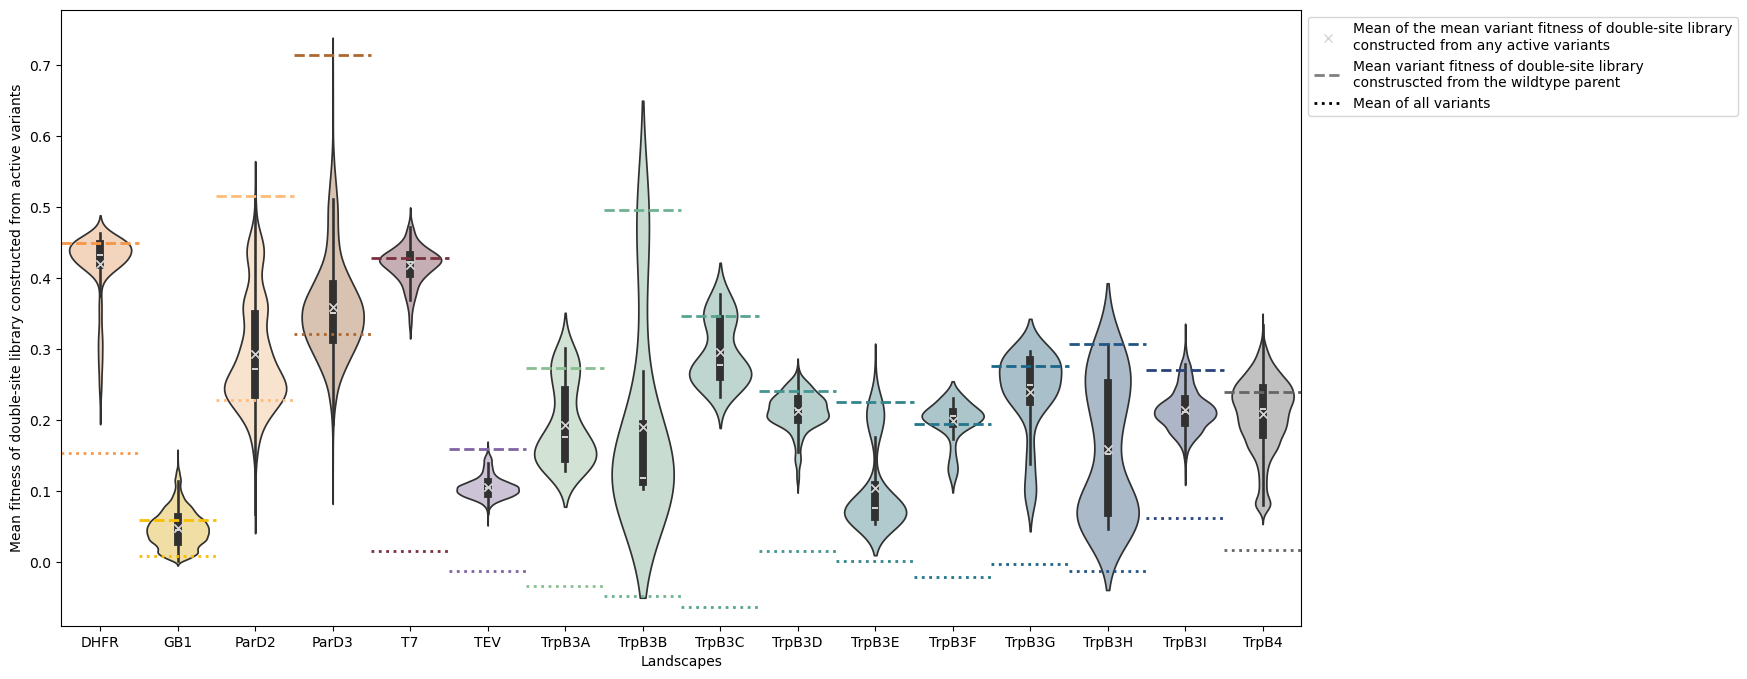

In [141]:
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

all_dfs = []
wt_mean = {}
full_mean = {}

for lib, lib_dict in LIB_INFO_DICT.items():

    df = pd.read_csv(f"results/hd_active/{lib}.csv")
    df["lib"] = lib
    all_dfs.append(df)

    wt_mean[lib] = df[df["AAs"] == "".join(lib_dict["AAs"].values())]["mean"].values[0]

    fit_df = pd.read_csv(f"data4upload/{lib2prot(lib)}/scale2max/{lib}.csv")
    full_mean[lib] = fit_df["fitness"].mean()

all_df = pd.concat(all_dfs)

plt.figure(figsize=(16, 8))  # Adjust the size as needed
ax = sns.violinplot(x="lib", y="mean", data=all_df, hue="lib", palette=LIB_COLORS)

# Set the alpha value of the facecolor automatically to 0.8
for violin in ax.collections[:]:  # Access only the violin bodies
    facecolor = violin.get_facecolor().flatten()  # Get the current facecolor
    violin.set_facecolor(
        mcolors.to_rgba(facecolor, alpha=0.4)
    )  # Set new facecolor with alpha=0.8

for lib in LIB_INFO_DICT.keys():

    # Find the position of the violin to add the line to
    position = all_df["lib"].unique().tolist().index(lib)

    # Overlay the mean as a scatter plot
    # ax.scatter(position, all_df[all_df["lib"]==lib]['mean'].mean(), color='white', marker='x', s=20, zorder=3)
    ax.axhline(
        all_df[all_df["lib"] == lib]["mean"].mean(),
        color=FZL_PALETTE["light_gray"],
        linestyle="solid",
        marker="x",
        linewidth=2,
        xmin=position / len(LIB_INFO_DICT) + 0.03125,
        xmax=(position + 1) / len(LIB_INFO_DICT) - 0.03125,
        # label=f"{lib} parent",
    )
    ax.axhline(
        wt_mean[lib],
        color=LIB_COLORS[lib],
        linestyle="--",
        linewidth=2,
        xmin=position / len(LIB_INFO_DICT),
        xmax=(position + 1) / len(LIB_INFO_DICT),
        # label=f"{lib} parent",
    )
    ax.axhline(
        full_mean[lib],
        color=LIB_COLORS[lib],
        linestyle="dotted",
        linewidth=2,
        xmin=position / len(LIB_INFO_DICT),
        xmax=(position + 1) / len(LIB_INFO_DICT),
        # label=f"{lib} parent",
    )


lines = [
    Line2D(
        [0], [0], color=FZL_PALETTE["light_gray"], linestyle="none", lw=2, marker="x"
    ),
    Line2D([0], [0], color="gray", linestyle="--", lw=2),
    Line2D([0], [0], color="black", linestyle="dotted", lw=2),
]
labels = [
    "Mean of the mean variant fitness of double-site library\nconstructed from any active variants",
    "Mean variant fitness of double-site library\nconstruscted from the wildtype parent",
    "Mean of all variants",
]

ax.legend(lines, labels, loc="upper left", bbox_to_anchor=(1, 1))

ax.set_xlabel("Landscapes")
ax.set_ylabel("Mean fitness of double-site library constructed from active variants")

# ax.set_title("Average fitness of double-site library variants with different backgrounds")
# ax.legend(loc="upper left", bbox_to_anchor=(1, 1))